In [75]:
using Plots
using HDF5
using Unitful
using UnitfulRecipes
using Statistics

# Load Filter output file

In [25]:
filename = "../results/speedy/testing/optimal.h5"
fh = h5open(filename, "r")

println("The following datasets found in file ", filename, ": ", keys(fh))
haskey(fh, "data_syn") && println("The following timestamps found: ", keys(fh["data_syn"]))
haskey(fh["data_syn"], "t0") && println("The following fields found: ", keys(fh["data_syn"]["t0"]))

The following datasets found in file ../results/speedy/testing/optimal.h5: ["data_avg", "data_syn", "data_var", "grid", "params", "stations", "timer", "weights"]
The following timestamps found: ["t0", "t1", "t10", "t100", "t101", "t102", "t103", "t104", "t105", "t106", "t107", "t108", "t109", "t11", "t110", "t111", "t112", "t113", "t114", "t115", "t116", "t117", "t118", "t119", "t12", "t120", "t121", "t122", "t123", "t124", "t125", "t126", "t127", "t128", "t129", "t13", "t130", "t131", "t132", "t133", "t134", "t135", "t136", "t137", "t138", "t139", "t14", "t140", "t141", "t142", "t143", "t144", "t145", "t146", "t147", "t148", "t149", "t15", "t150", "t151", "t152", "t153", "t154", "t155", "t156", "t157", "t158", "t159", "t16", "t160", "t161", "t162", "t163", "t164", "t165", "t166", "t167", "t168", "t169", "t17", "t170", "t171", "t172", "t173", "t174", "t175", "t176", "t177", "t178", "t179", "t18", "t180", "t181", "t182", "t183", "t184", "t185", "t186", "t187", "t188", "t189", "t19", "t1

# Load Nature Data

In [4]:
filename = "DATA/nature_runs.h5"
th = h5open(filename, "r")

println("The following datasets found in file ", filename, ": ", keys(th))
haskey(th, "data_nature") && println("The following timestamps found: ", keys(th["data_nature"]))
haskey(th["data_nature"], "t1") && println("The following fields found: ", keys(th["data_nature"]["t1"]))

The following datasets found in file DATA/nature_runs.h5: ["data_nature"]
The following timestamps found: ["t0", "t1", "t10", "t100", "t101", "t102", "t103", "t104", "t105", "t106", "t107", "t108", "t109", "t11", "t110", "t111", "t112", "t113", "t114", "t115", "t116", "t117", "t118", "t119", "t12", "t120", "t121", "t122", "t123", "t124", "t125", "t126", "t127", "t128", "t129", "t13", "t130", "t131", "t132", "t133", "t134", "t135", "t136", "t137", "t138", "t139", "t14", "t140", "t141", "t142", "t143", "t144", "t145", "t146", "t147", "t148", "t149", "t15", "t150", "t151", "t152", "t153", "t154", "t155", "t156", "t157", "t158", "t159", "t16", "t160", "t161", "t162", "t163", "t164", "t165", "t166", "t167", "t168", "t169", "t17", "t170", "t171", "t172", "t173", "t174", "t175", "t176", "t177", "t178", "t179", "t18", "t180", "t181", "t182", "t183", "t184", "t185", "t186", "t187", "t188", "t189", "t19", "t190", "t191", "t192", "t193", "t194", "t195", "t196", "t197", "t198", "t199", "t2", "t20"

# Set these parameters to choose what to plot

In [27]:
timestamp = "t1" # Edit this value to plot a different time slice from the list above
field = "ps" # Choose from the fields listed above
output_folder = "../results/speedy/testing/"
unit_comp = 0.01
level = 1

1

# Collect data from the files

In [28]:
field_unit = read(fh["data_syn"][timestamp][field]["Unit"])
var_unit = read(fh["data_var"][timestamp][field]["Unit"])
x_unit = read(fh["grid"]["x"]["Unit"])
y_unit = read(fh["grid"]["y"]["Unit"])
x_st_unit = read(fh["stations"]["x"]["Unit"])
y_st_unit = read(fh["stations"]["y"]["Unit"])

field_desc = read(fh["data_syn"][timestamp][field]["Description"])

x = read(fh["grid"]["x"]) .* uparse(x_unit) .|> u"°"
y = read(fh["grid"]["y"]) .* uparse(y_unit) .|> u"°"
z_t = read(fh["data_syn"][timestamp][field]) .* uparse(field_unit)
z_avg = read(fh["data_avg"][timestamp][field]) .* uparse(field_unit)
z_var = read(fh["data_var"][timestamp][field]) .* uparse(var_unit)
z_std = sqrt.(z_var)
x_st = read(fh["stations"]["x"]) .* uparse(x_st_unit) .|> u"°"
y_st = read(fh["stations"]["y"]) .* uparse(y_st_unit) .|> u"°"

50-element Vector{Quantity{Float64, NoDims, Unitful.FreeUnits{(°,), NoDims, nothing}}}:
                 0.0°
 0.20052719065466762°
 0.33421198442444605°
  0.5347391750791137°
  0.5347391750791137°
  0.6684239688488921°
  0.6684239688488921°
  0.6684239688488921°
  0.8689511595035598°
  0.8689511595035598°
  0.8689511595035598°
  1.0026359532733382°
  1.0026359532733382°
                    ⋮
   2.138956700316455°
   2.138956700316455°
  2.2726414940862334°
  2.2726414940862334°
  2.2726414940862334°
   2.473168684740901°
   2.473168684740901°
   2.473168684740901°
   2.606853478510679°
   2.606853478510679°
   2.807380669165347°
  2.9410654629351254°

In [29]:
field_unit = read(th["data_nature"][timestamp][field]["Unit"])
field_desc = read(th["data_nature"][timestamp][field]["Description"])
z_truth = read(th["data_nature"][timestamp][field]) .* uparse(field_unit);


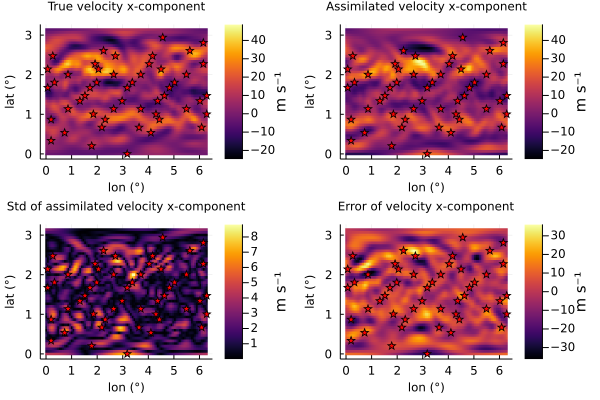

In [284]:
function plot_tdata(x, y, z_t, z_avg, z_std, field_desc)
    n_contours = 100
    zmax = max(maximum(z_t), maximum(z_avg))
    zmin = min(minimum(z_t), minimum(z_avg))
    levels = range(zmin, zmax; length=n_contours)
    z_err = z_t-z_avg
    p1 = heatmap(x, y, transpose(z_t); title="True $(lowercase(field_desc))")
    p2 = heatmap(x, y, transpose(z_avg); title="Assimilated $(lowercase(field_desc))")
    p3 = heatmap(x, y, transpose(z_std); title="Std of assimilated $(lowercase(field_desc))")
    p4 = heatmap(x, y, transpose(z_err); title="Error of $(lowercase(field_desc))")
    for (i, plt) in enumerate((p1, p2, p3, p4))
        # Set labels
        plot!(plt; xlabel="lon", ylabel="lat")
        # Set range of color bar for first two plots
        i ∈ (1, 2) && plot!(plt; clims=(ustrip(zmin), ustrip(zmax)))
        # Add the positions of the stations
        scatter!(plt, x_st, y_st, color=:red, marker=:star, label="")
    end

    plot(p1, p2, p3, p4; titlefontsize=8, guidefontsize=8)
end

plot_tdata(x, y, z_truth[:,:,level]*unit_comp, z_avg[:,:,level]*unit_comp, z_std[:,:,level]*unit_comp, field_desc)
# savefig("../results/speedy/testing/Obs.png")

In [285]:
animation = @animate for timestamp ∈ keys(fh["data_syn"])
    z_truth = read(th["data_nature"][timestamp][field]) .* uparse(field_unit)
    z_avg = read(fh["data_avg"][timestamp][field]) .* uparse(field_unit)
    z_var = read(fh["data_var"][timestamp][field]) .* uparse(var_unit)
    z_std = sqrt.(z_var)

    plot_tdata(x, y, z_truth[:,:,level]*unit_comp, z_avg[:,:,level]*unit_comp, z_std[:,:,level]*unit_comp, field_desc)
end

mp4(animation, joinpath(output_folder,string(field,"_opt.mp4")); fps=2)

┌ Info: Saved animation to 
│   fn = /Users/dangiles/.julia/dev/ParticleDA/results/speedy/testing/u_opt.mp4
└ @ Plots /Users/dangiles/.julia/packages/Plots/FI0vT/src/animation.jl:114


Plots.AnimatedGif("/Users/dangiles/.julia/dev/ParticleDA/results/speedy/testing/u_opt.mp4")

# Time Series of RMSE

In [286]:

rmse = Float64[].* uparse(field_unit)
for it = 0:length(keys(fh["data_syn"]))-1
    timestamp = "t" * string(it)
    z_truth = read(th["data_nature"][timestamp][field]) .* uparse(field_unit)
    z_avg = read(fh["data_avg"][timestamp][field]) .* uparse(field_unit)
    error = sqrt.(mean((z_truth[:,:,level].-z_avg[:,:,level]).^2))
    push!(rmse, error)
end
@show rmse

plot(rmse*unit_comp, label="", marker=:o, xlabel="Time step", ylabel="RMSE", title=string(field, "(level = ", level,")"))
savefig(joinpath(output_folder,string(field,"_rmse_opt.png")))


rmse = Quantity{Float64, 𝐋 𝐓⁻¹, Unitful.FreeUnits{(m, s⁻¹), 𝐋 𝐓⁻¹, nothing}}[8.295101492347111 m s⁻¹, 9.88033177699963 m s⁻¹, 9.07010549008879 m s⁻¹, 10.080095380827776 m s⁻¹, 10.086108408487732 m s⁻¹, 10.141448145091937 m s⁻¹, 10.18384585947392 m s⁻¹, 10.167868163202362 m s⁻¹, 10.187736139970701 m s⁻¹, 10.222644944474041 m s⁻¹, 10.297614179241227 m s⁻¹, 10.376996804949028 m s⁻¹, 10.423954264161956 m s⁻¹, 10.44291756597646 m s⁻¹, 10.516588339233431 m s⁻¹, 10.59480223713864 m s⁻¹, 10.638343403004123 m s⁻¹, 10.600528681731259 m s⁻¹, 10.571729937541154 m s⁻¹, 10.485985700864608 m s⁻¹, 10.461684301008882 m s⁻¹, 10.36753565308959 m s⁻¹, 10.307271602503505 m s⁻¹, 10.21177271676584 m s⁻¹, 10.241221166386026 m s⁻¹, 10.270290409197358 m s⁻¹, 10.18969194108167 m s⁻¹, 10.056519614760017 m s⁻¹, 9.921791205418069 m s⁻¹, 9.771944859974116 m s⁻¹, 9.696550521442994 m s⁻¹, 9.617032614519365 m s⁻¹, 9.583585415533532 m s⁻¹, 9.633123536010876 m s⁻¹, 9.676468232685703 m s⁻¹, 9.794105268577214 m s⁻¹, 9.8836

# Spatial RMSE

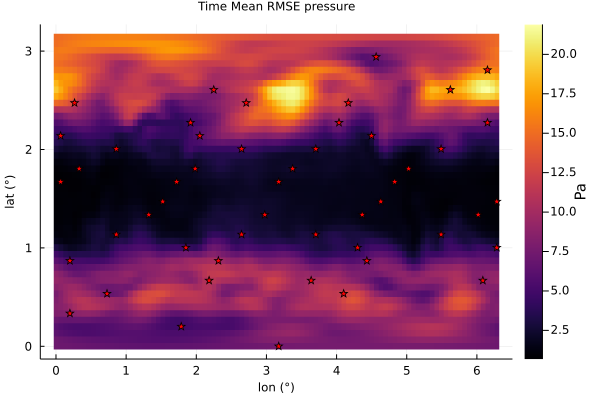

In [76]:
error = zeros(96,48, length(keys(fh["data_syn"]))).* uparse(field_unit)

for it = 0:length(keys(fh["data_syn"]))-1
    timestamp = "t" * string(it)
    z_truth = read(th["data_nature"][timestamp][field]) .* uparse(field_unit)
    z_avg = read(fh["data_avg"][timestamp][field]) .* uparse(field_unit)
    @view(error[:,:,it+1]) .= sqrt.((@view(z_truth[:,:,level]) - @view(z_avg[:,:,level])).^2)
end
error = error*unit_comp
rmse = mean(error, dims=3)

function plot_rmsedata(x, y, rmse, field_desc)
    n_contours = 100
    zmax = maximum(rmse)
    zmin = minimum(rmse)
    levels = range(zmin, zmax; length=n_contours)
    
    p1 = heatmap(x, y, transpose(rmse); title="Time Mean RMSE $(lowercase(field_desc))")
    plot!(p1; xlabel="lon", ylabel="lat")
    plot!(p1; clims=(ustrip(zmin), ustrip(zmax)))

    scatter!(p1, x_st, y_st, color=:red, marker=:star, label="")


    plot(p1; titlefontsize=8, guidefontsize=8)
end

plot_rmsedata(x, y, rmse[:,:,1], field_desc)

# savefig(joinpath(output_folder,"Time-mean_RMSE.png"))